In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def calc_rsi(closes, period=14):
  # Calculate the difference in price from the previous step
  delta = closes.diff()

  # Get rid of the first row (NaN due to no previous price)
  delta = delta[1:]

  # Separate positive and negative changes
  up, down = delta.clip(lower=0), delta.clip(upper=0) * -1

  # Calculate the average gain and loss over the period
  ema_up = up.ewm(alpha=1/period, min_periods=period-1).mean()
  ema_down = down.ewm(alpha=1/period, min_periods=period-1).mean()

  # Avoid zero division by smoothing the denominator with a small value (e.g., 1e-7)
  rs = ema_up / (ema_down + 1e-7)

  # Calculate the RSI
  rsi = 100 - (100 / (1 + rs))
  return rsi


In [8]:
data = pd.read_csv('./Nifty 50 Historical Data.csv')

In [15]:
price = data['Price'].apply(lambda a:a.replace(',','')).astype('f')

In [19]:
rsi = calc_rsi(price)

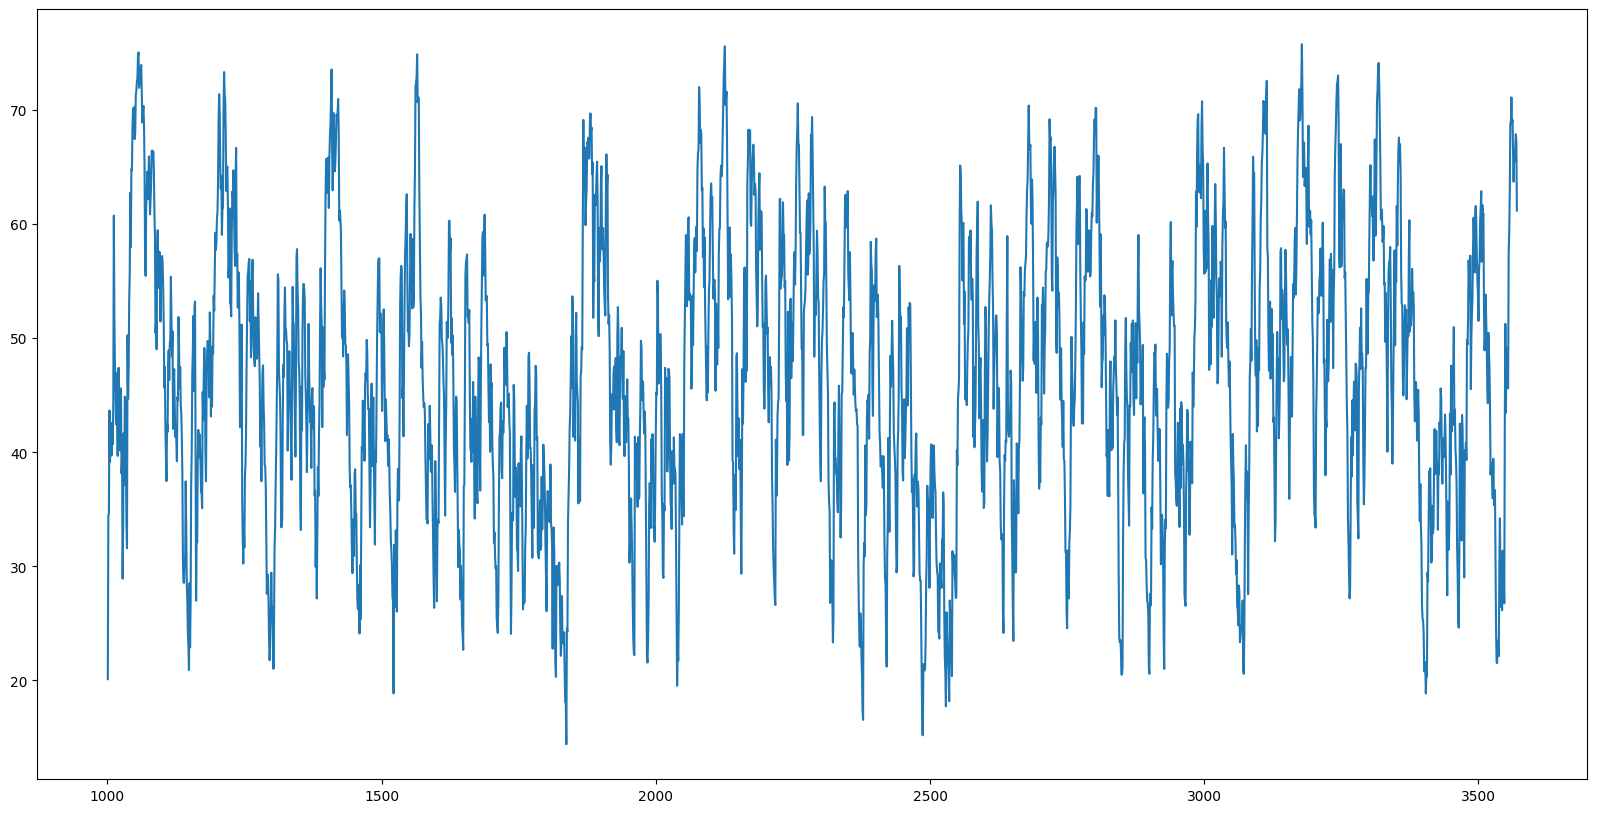

In [38]:
plt.figure(figsize=(20, 10)) 
plt.plot(rsi[1000:])
plt.show()

In [39]:
data_min = pd.read_csv('NIFTY 50 - Minute data.csv')

In [42]:
price_min =data_min['close']

In [43]:
rsi_min = calc_rsi(price_min)

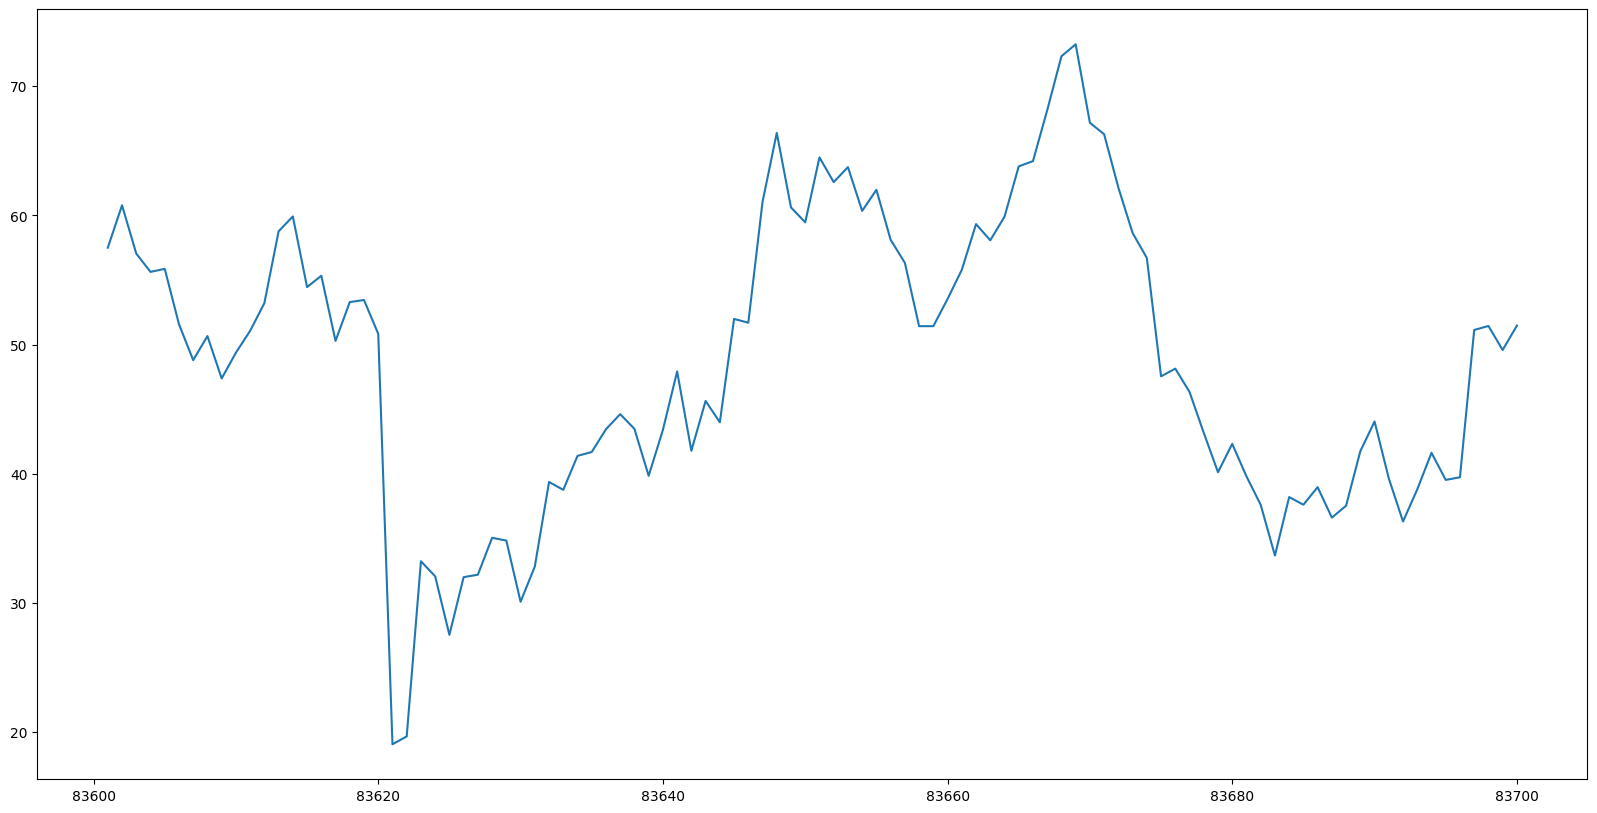

In [58]:
plt.figure(figsize=(20, 10)) 
plt.plot(rsi_min[83600:83700])
plt.show()

In [79]:
rsi_min_int = rsi_min.dropna().apply(lambda x:int(x))

In [92]:
value_counts = rsi_min_int.value_counts()

<BarContainer object of 100 artists>

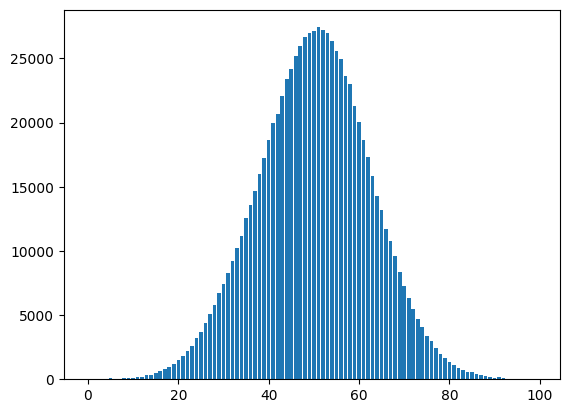

In [102]:
plt.bar(value_counts.index,height=value_counts.values)

In [163]:
def prob_calc(rsi_value,rsi_data):
    up_counts = rsi_data[rsi_data > rsi_value].count()
    down_counts = rsi_data[rsi_data < rsi_value].count()
    total_counts = len(rsi_data) - rsi_data[rsi_data == rsi_value].count()
    
    # Calculate probability of going up (excluding 50)
    probability_up = up_counts / total_counts
    
    # Calculate probability of going down (excluding 50)
    probability_down = down_counts / total_counts
    
    # Print the probabilities (rounded to 4 decimals)
    print("Probability of RSI going up from 50:", round(probability_up, 4))
    print("Probability of RSI going down from 50:", round(probability_down, 4))

In [142]:
prob_calc(42)

Probability of RSI going up from 50: 0.7532
Probability of RSI going down from 50: 0.2468


In [122]:
rsi_min_int.quantile(0.75)

58.0

In [174]:
def outliers(data_series):
    
  q1 = data_series.quantile(0.25)
  q3 = data_series.quantile(0.75)
  iqr = q3 - q1

  upper_fence = q3 + (1.5 * iqr)
  lower_fence = q1 - (1.5 * iqr)

  # Identify outliers based on IQR
  iqr_outliers = data_series[(data_series < lower_fence) | (data_series > upper_fence)].tolist()

  return iqr_outliers

print("Outliers based on IQR:", iqr_outliers)
print(len(outliers(rsi_min_int)))


Outliers based on IQR: [13, 16, 84, 86, 88, 15, 17, 15, 14, 14, 11, 10, 17, 15, 15, 14, 13, 15, 96, 83, 16, 83, 86, 84, 86, 87, 87, 88, 83, 83, 84, 85, 85, 86, 84, 85, 86, 83, 86, 87, 88, 84, 16, 14, 15, 13, 17, 16, 16, 17, 17, 17, 16, 16, 16, 16, 85, 92, 85, 17, 17, 16, 17, 14, 16, 15, 17, 17, 17, 17, 15, 86, 83, 83, 16, 13, 84, 85, 83, 83, 85, 85, 86, 83, 83, 17, 15, 12, 83, 84, 83, 87, 88, 16, 16, 16, 17, 14, 14, 83, 85, 84, 83, 17, 16, 84, 17, 17, 15, 17, 12, 13, 17, 16, 15, 13, 17, 16, 17, 16, 84, 15, 83, 83, 86, 83, 16, 17, 16, 16, 84, 16, 15, 13, 7, 12, 12, 11, 9, 6, 14, 84, 85, 84, 14, 12, 16, 83, 87, 88, 83, 84, 15, 10, 16, 15, 11, 15, 14, 16, 15, 83, 84, 85, 86, 87, 87, 88, 89, 89, 83, 84, 13, 11, 8, 8, 16, 16, 16, 13, 11, 83, 17, 86, 83, 85, 15, 15, 9, 14, 14, 10, 17, 83, 17, 87, 89, 17, 17, 84, 16, 17, 16, 83, 15, 14, 16, 5, 9, 10, 9, 9, 13, 12, 11, 12, 85, 16, 11, 15, 10, 17, 10, 13, 13, 17, 17, 16, 17, 83, 83, 84, 84, 84, 84, 87, 90, 90, 85, 86, 87, 84, 83, 16, 16, 17, 16

In [140]:
rsi_min_int.quantile(0.75) + 1.5*(rsi_min_int.quantile(0.75) - rsi_min_int.quantile(0.25))

82.0

In [141]:
rsi_min_int.quantile(0.25) - 1.5*(rsi_min_int.quantile(0.75) - rsi_min_int.quantile(0.25))

18.0

In [177]:
rsi_int.quantile(0.75) + 1.5*(rsi_int.quantile(0.75) - rsi_int.quantile(0.25))
,rsi_int.quantile(0.25) - 1.5*(rsi_int.quantile(0.75) - rsi_int.quantile(0.25))

TypeError: 'numpy.float64' object is not callable

In [147]:
rsi_int = rsi.dropna().apply(lambda x:int(x))

In [173]:
rsi_int.quantile(0.25)

36.0

In [181]:
# using daily data 
prob_calc(50,rsi_int)

Probability of RSI going up from 50: 0.3547
Probability of RSI going down from 50: 0.6453


In [182]:
# using minute data 
prob_calc(50,rsi_min_int)

Probability of RSI going up from 50: 0.5103
Probability of RSI going down from 50: 0.4897
